<a href="https://colab.research.google.com/github/tringuyen180303/California_prediction_tutorials/blob/main/California_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import sklearn
import numpy 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
print(IMAGES_PATH)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
    plt.figure.save_fig(path, format=fig_extension, dpi=resolution)

  


./images/end_to_end_project


In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()


In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


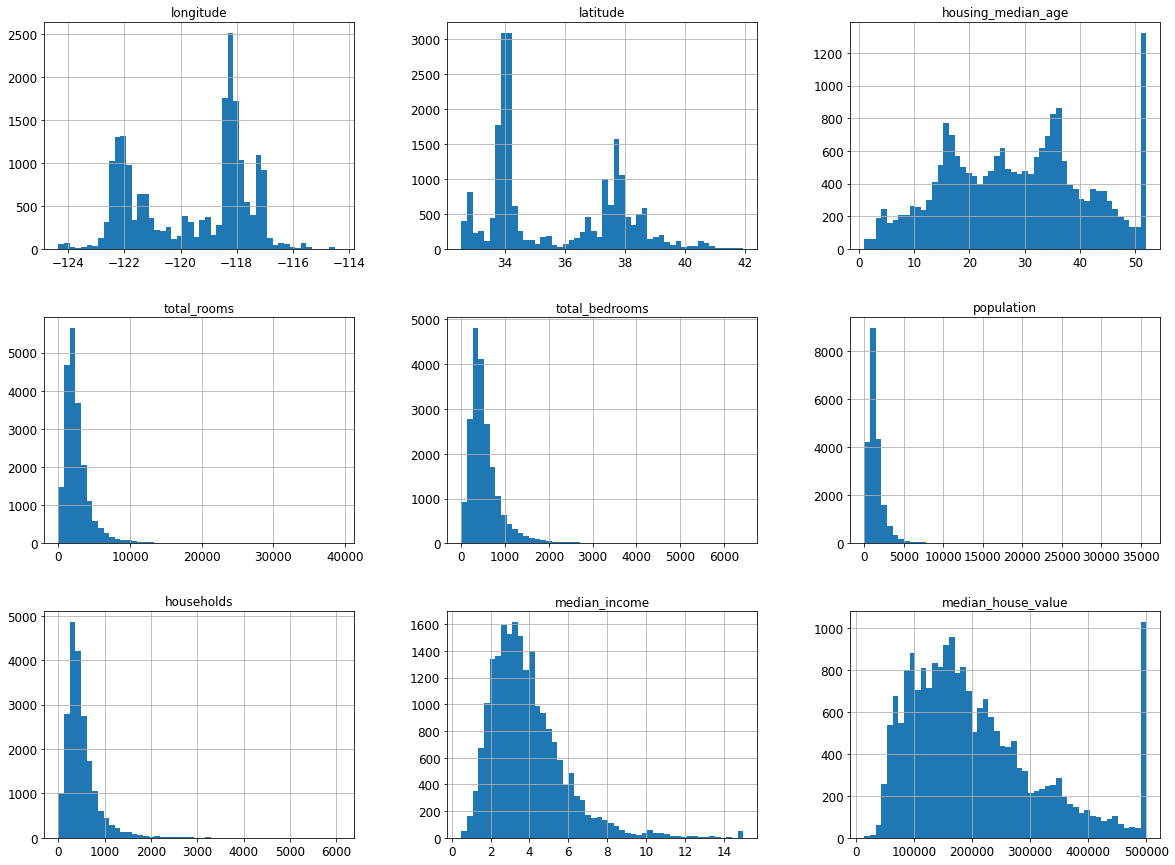

In [ ]:
housing.hist(bins=50, figsize=(20,15))

plt.show()

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))

16512


In [ ]:
print(len(test_set))

4128


In [ ]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 * 32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]


In [ ]:
import hashlib
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
  return bytearray(hash(np.int64(identifier)).digest())[-1] < (256 * test_ratio)


In [ ]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(train_set)
print(test_set)


       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
6          6    -122.25     37.84                52.0       2535.0   
...      ...        ...       ...                 ...          ...   
20634  20634    -121.56     39.27                28.0       2332.0   
20635  20635    -121.09     39.48                25.0       1665.0   
20636  20636    -121.21     39.49                18.0        697.0   
20638  20638    -121.32     39.43                18.0       1860.0   
20639  20639    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401

In [ ]:
#print(housing_with_id)
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(train_set.id)
print(test_set.head())

0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
           ...    
20634   -121520.73
20635   -121050.52
20637   -121180.57
20638   -121280.57
20639   -121200.63
Name: id, Length: 16267, dtype: float64
    index  longitude  latitude  housing_median_age  total_rooms  \
8       8    -122.26     37.84                42.0       2555.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   
12     12    -122.26     37.85                52.0       2491.0   
13     13    -122.26     37.84                52.0        696.0   

    total_bedrooms  population  households  median_income  median_house_value  \
8            665.0      1206.0       595.0         2.0804            226700.0   
10           434.0       910.0       402.0         3.2031            281500.0   
11           752.0      1504.0       734.0         3.2705            241800.0   
12           474.0      

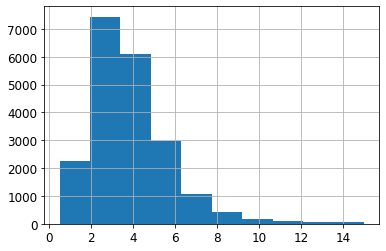

In [ ]:
housing["median_income"].hist()

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels= [1,2,3,4,5])
print(np.inf)

inf


In [ ]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

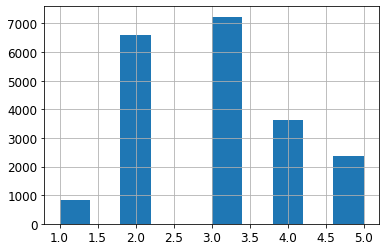

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size =0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)
housing["income_cat"].value_counts() / len(housing)

def income_cat_proportions(data):
  return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame(
    {"Overall": income_cat_proportions(housing),
     "Stratified": income_cat_proportions(strat_test_set),
     "Random": income_cat_proportions(test_set)}
).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

print(compare_props)
print("_" * 10)
print(strat_train_set)
print("_" * 10)
print(strat_test_set)
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

print("_" * 10)
print(strat_train_set)
print("_" * 10)
print(strat_test_set)



    Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039971  0.040213      0.973236       0.364964
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114341  0.109496     -4.318374      -0.084674
__________
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.

In [ ]:
housing = strat_train_set.copy()

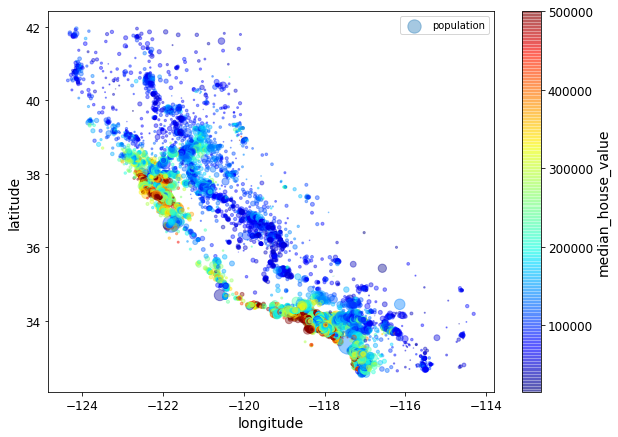

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", 
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)
plt.legend()

In [ ]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end-to-end-project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project" + filename
urllib.request.urlretrieve("https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png", os.path.join(images_path, filename))


('./images/end-to-end-project/california.png',
 <http.client.HTTPMessage at 0x7f40c06947d0>)

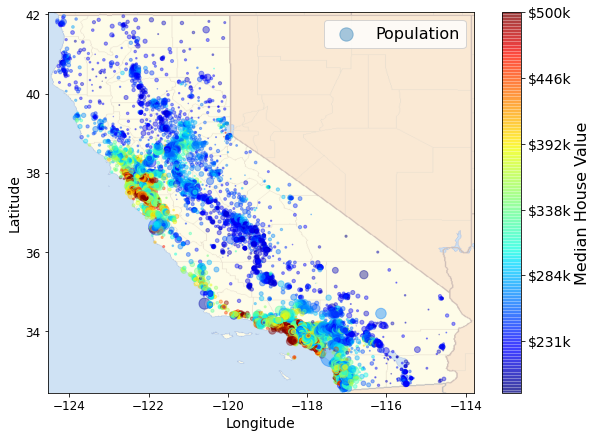

In [ ]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude",
                  figsize=(10,7), s=housing["population"]/100,
                 label="Population", c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 10)
cbar = plt.colorbar(ticks=tick_values/prices.max())

cbar.ax.set_yticklabels(["$%dk" %round(v/1000) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()


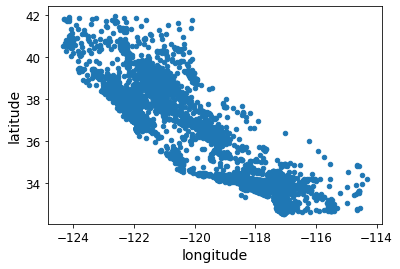

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")


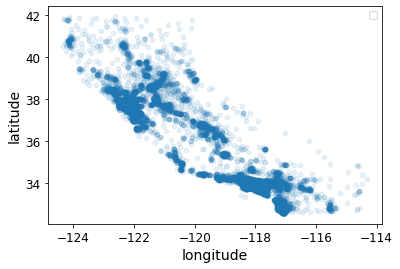

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.legend()




In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

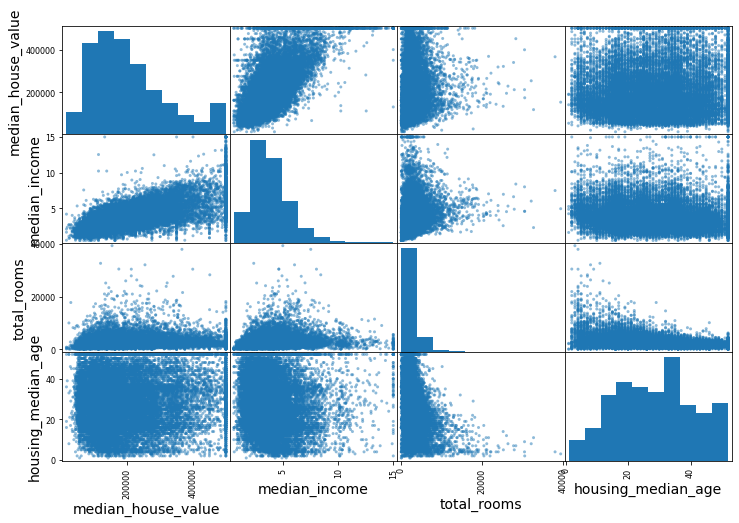

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

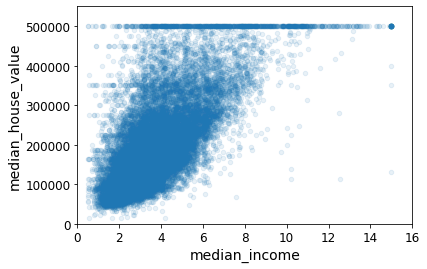

In [ ]:
housing.plot(kind="scatter", x="median_income", y = "median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["households"]
housing["population_per_household"] = housing["population"]/housing["households"]
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)



median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_rooms         -0.046739
latitude                   -0.144160
Name: median_house_value, dtype: float64

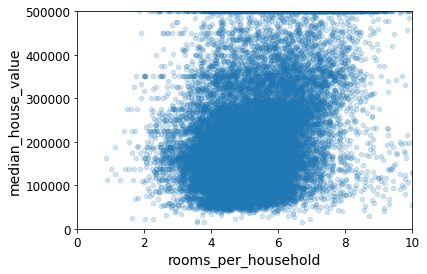

In [ ]:
housing.plot(kind="scatter", x = "rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 10, 0, 500000])
plt.show()

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_rooms,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,1.098862,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.509381,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.333333,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,1.005772,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,1.048780,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,1.099153,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,34.066667,1243.333333


In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
print(sample_incomplete_rows)

sample_incomplete_rows.dropna(subset=["total_bedrooms"])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   
...          ...       ...                 ...          ...             ...   
1350     -121.95     38.03                 5.0       5526.0             NaN   
4691     -118.37     34.07                50.0       2519.0             NaN   
9149     -118.50     34.46                17.0      10267.0             NaN   
16757    -122.48     37.70                33.0       4492.0             NaN   
13336    -117.67     34.04                13.0       1543.0             NaN   

       population  households  median_income ocean_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
sample_incomplete_rows.dropna('total_bedrooms', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


TypeError: ignored

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
print(housing_num)
imputer.fit(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
1265

SimpleImputer(strategy='median')

In [ ]:
print(imputer.statistics_)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income ocean_

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index= housing.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [ ]:
housing_cat = housing[["ocean_proximity"]]
print(housing_cat.head(10))

      ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
housing_cat_1hot.toarray()

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix ,bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, population_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, household_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                   bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_addder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_addder.transform(housing.values)
print(housing_extra_attribs)


[[-121.46 38.52 29.0 ... 'INLAND' 3.168555240793201 3.168555240793201]
 [-117.23 33.09 7.0 ... 'NEAR OCEAN' 2.6236979166666665
  2.6236979166666665]
 [-119.04 35.37 44.0 ... 'INLAND' 2.223333333333333 2.223333333333333]
 ...
 [-122.72 38.44 48.0 ... '<1H OCEAN' 2.6627906976744184
  2.6627906976744184]
 [-122.7 38.31 14.0 ... '<1H OCEAN' 2.411177644710579 2.411177644710579]
 [-122.14 39.97 27.0 ... 'INLAND' 3.1725888324873095 3.1725888324873095]]


In [ ]:
col_names = "total_rooms", "total_bedrooms", 'population', "households"
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    housing.columns.get_loc(c) for c in col_names
]
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index = housing.index
)

print(housing_extra_attribs)

      longitude latitude housing_median_age total_rooms total_bedrooms  \
12655   -121.46    38.52               29.0      3873.0          797.0   
15502   -117.23    33.09                7.0      5320.0          855.0   
2908    -119.04    35.37               44.0      1618.0          310.0   
14053   -117.13    32.75               24.0      1877.0          519.0   
20496    -118.7    34.28               27.0      3536.0          646.0   
...         ...      ...                ...         ...            ...   
15174   -117.07    33.03               14.0      6665.0         1231.0   
12661   -121.42    38.51               15.0      7901.0         1422.0   
19263   -122.72    38.44               48.0       707.0          166.0   
19140    -122.7    38.31               14.0      3155.0          580.0   
19773   -122.14    39.97               27.0      1079.0          222.0   

      population households median_income ocean_proximity rooms_per_household  \
12655     2237.0      706.0   

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline(
    [("imputer", SimpleImputer(strategy="median")),
      ("attribs_adder", CombinedAttributeAdder()),
     ("std_scaler", StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[-0.94135046  1.34743822  0.02756357 ...  0.00622264  0.00622264
   0.04629766]
 [ 1.17178212 -1.19243966 -1.72201763 ... -0.04081077 -0.04081077
   0.01826884]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.07537122 -0.07537122
  -0.12524691]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.03743619 -0.03743619
  -0.2477044 ]
 [-1.56080303  1.2492109  -1.1653327  ... -0.05915604 -0.05915604
   0.09797804]
 [-1.28105026  2.02567448 -0.13148926 ...  0.00657083  0.00657083
   0.04272245]]


In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

print(housing_prepared)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


In [ ]:
housing_prepared.shape

(16512, 16)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class OldDataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

  

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
old_num_pipeline = Pipeline([
    ("selector", OldDataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributeAdder()),
    ("std_scaler", StandardScaler())
                             ])

old_cat_pipeline = Pipeline([
    ("selector", OldDataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

from sklearn.pipeline import FeatureUnion
old_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline)
])

old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))


Predictions:  [ 87905.31028738 304793.98227946 153414.70854049 184470.41987532
 246730.78996768]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rsme = np.sqrt(lin_mse)
print(lin_rsme)


68944.93035163771


In [ ]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print(lin_mae)

49839.753397834684


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rsme = np.sqrt(tree_mse)
print(tree_rsme)

0.0


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared,
                         housing_labels, scoring="neg_mean_squared_error")
tree_rsme_scores = np.sqrt(-scores)
print(tree_rsme_scores)

[70349.15550676 72728.53666849 71034.17523821 73788.86998047
 69318.14063167]


In [ ]:
def display_scores(scores):
  print("Scores", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())
display_scores(tree_rsme_scores)

Scores [70349.15550676 72728.53666849 71034.17523821 73788.86998047
 69318.14063167]
Mean:  71443.77560511949
Standard deviation:  1614.581573036693


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rsme_scores = np.sqrt(-lin_scores)
display_scores(lin_rsme_scores)

Scores [72197.09675223 64769.03825667 68106.48171428 69083.63164135
 67144.32310361 72892.81230013 71485.9550862  69306.56414291
 66898.42259086 70560.07785741]
Mean:  69244.44034456598
Standard deviation:  2450.556516681639


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)



RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18995.09634127717


In [ ]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared,
                                housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rsme_scores = np.sqrt(-forest_scores)
display_scores(forest_rsme_scores)


Scores [52632.32103412 50437.2303225  47224.77975935 52632.92595697
 48385.07048322 51046.77813428 53266.42198925 50517.52069249
 48501.4993449  55088.45855979]
Mean:  50973.30062768695
Standard deviation:  2346.492841573869


In [ ]:
scores = cross_val_score(lin_reg, housing_prepared,
                         housing_labels, scoring="neg_mean_squared_error", cv=5)
pd.Series(np.sqrt(-scores)).describe()


count    5.000000e+00
mean     6.841912e+12
std      1.529898e+13
min      6.823910e+04
25%      6.881127e+04
50%      7.005391e+04
75%      7.046103e+04
max      3.420956e+13
dtype: float64

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rsme = np.sqrt(svm_mse)
print(svm_rsme)


111759.09216560166


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [3, 10, 30],
     'max_features': [2, 4, 6, 8]},
     {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)
  

66899.14512010076 {'max_features': 2, 'n_estimators': 3}
56852.91820727137 {'max_features': 2, 'n_estimators': 10}
54083.63967398324 {'max_features': 2, 'n_estimators': 30}
60657.075236995785 {'max_features': 4, 'n_estimators': 3}
53360.76382456302 {'max_features': 4, 'n_estimators': 10}
50616.498856675506 {'max_features': 4, 'n_estimators': 30}
58585.25536630264 {'max_features': 6, 'n_estimators': 3}
52326.081486197276 {'max_features': 6, 'n_estimators': 10}
50200.71643979342 {'max_features': 6, 'n_estimators': 30}
59849.77069534887 {'max_features': 8, 'n_estimators': 3}
53576.5439097315 {'max_features': 8, 'n_estimators': 10}
50694.47315768787 {'max_features': 8, 'n_estimators': 30}
63867.92576542389 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55301.512485382285 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59124.559836285225 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52620.21653550791 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053625,0.001812,0.002666,0.000136,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.217987e+09,-4.561342e+09,...,-4.475496e+09,1.795025e+08,18,-1.141070e+09,-1.256430e+09,-1.283654e+09,-1.144534e+09,-1.118868e+09,-1.188911e+09,6.737828e+07
1,0.174500,0.004454,0.008906,0.000550,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.110611e+09,-3.131402e+09,...,-3.232254e+09,1.021680e+08,11,-5.825120e+08,-6.291449e+08,-6.179799e+08,-5.890042e+08,-6.027398e+08,-6.042761e+08,1.740987e+07
2,0.512514,0.003375,0.025124,0.000314,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.890733e+09,-2.793621e+09,...,-2.925040e+09,9.123285e+07,9,-4.487347e+08,-4.586237e+08,-4.567580e+08,-4.389912e+08,-4.437589e+08,-4.493733e+08,7.480906e+06
3,0.087372,0.001866,0.002818,0.000246,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.753610e+09,-3.418014e+09,...,-3.679281e+09,1.563777e+08,16,-9.941429e+08,-9.792849e+08,-1.050692e+09,-9.890224e+08,-9.855316e+08,-9.997347e+08,2.593297e+07
4,0.285390,0.001507,0.008673,0.000083,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.841609e+09,-2.663770e+09,...,-2.847371e+09,1.212545e+08,7,-5.157754e+08,-5.446338e+08,-5.334381e+08,-5.321120e+08,-5.366563e+08,-5.325231e+08,9.436576e+06
5,0.856279,0.005717,0.025408,0.000287,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.572527e+09,-2.406456e+09,...,-2.562030e+09,9.328433e+07,2,-3.882115e+08,-4.000207e+08,-3.933784e+08,-3.893469e+08,-3.928665e+08,-3.927648e+08,4.134003e+06
6,0.116417,0.002403,0.002846,0.000135,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.692622e+09,-3.493959e+09,...,-3.432232e+09,1.759426e+08,12,-9.118890e+08,-9.596337e+08,-9.116305e+08,-8.489513e+08,-9.165210e+08,-9.097251e+08,3.532372e+07
7,0.394547,0.003020,0.009126,0.000610,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.812518e+09,-2.678276e+09,...,-2.738019e+09,9.170549e+07,5,-5.048656e+08,-5.299685e+08,-5.036251e+08,-4.966852e+08,-5.333573e+08,-5.137003e+08,1.496748e+07
8,1.200921,0.007913,0.025454,0.000383,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.563614e+09,-2.445774e+09,...,-2.520112e+09,9.680762e+07,1,-3.781315e+08,-3.989299e+08,-3.866969e+08,-3.781388e+08,-3.974624e+08,-3.878719e+08,9.002750e+06
9,0.154167,0.005083,0.002823,0.000307,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.612758e+09,-3.318131e+09,...,-3.581995e+09,2.484539e+08,15,-9.348862e+08,-9.515494e+08,-9.563096e+08,-9.438072e+08,-9.689666e+08,-9.511038e+08,1.151197e+07


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features" : randint(low=1, high=8)
}
forest_reg = RandomForestRegressor(random_state=6)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=params_distribs,
                                n_iter=10, cv=5,
                                scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs= {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8)
}
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, 
                                scoring="neg_mean_squared_error",
                                random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
                              cvres["params"]):
  print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)


In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:

final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rsme = np.sqrt(final_mse)


In [ ]:
print(final_mse)

2343817164.51985


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1+ confidence)/2 , df = m- 1)
tmargin = tscore * squared_errors.std(ddof=-1)/np.sqrt(m)
np.sqrt(mean-tmargin), np.sqrt(mean + tmargin)


In [ ]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)



In [ ]:
my_model = full_pipeline_with_predictor
import joblib
joblib.dump(my_model, "my_model.pk1")
my_model_loaded = joblib.load("my_model.pk1")

In [ ]:
from scipy.stats import geom, expon
geom_distrib = geom(0.5).rvs(10000, random_state=42)
print(geom_distrib)
expon_distrib = expon(scale=1).rvs(10000, random_state=42)
plt.hist(expon_distrib, bins=50)
plt.hist(geom_distrib, bins=50)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"kernel": ["linear"], "C":[10., 30., 100.,300.,1000.,3000.,
                                10000., 30000.]}
    {"kernel": ["rbf"], "C"}
    
]

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from keras.layers import LSTM
import pickle


FileNotFoundError: ignored